In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


# loading the dataset

In [4]:
#loading the data
data=pd.read_csv("C:\\Users\\hp\\Downloads\\dataset (1).csv")
print(data)

          id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          children          Rural              95.12  

# Describing the data:

In [5]:
#head
print("\nhead(first 5 rows) of the dataset:\n")
print(data.head())


head(first 5 rows) of the dataset:

      id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0  


In [6]:
#tail
print("\n\ntail(last 5 rows) of the dataset:\n")
print(data.tail())



tail(last 5 rows) of the dataset:

          id  gender   age  hypertension  heart_disease ever_married  \
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
43395  children          Urban              58.64  20.4     never smoked   
43396  Govt_job          Urban             213.61  55.4  formerly smoked   
43397   Private          Urban              91.94  28.9  formerly smoked   
43398   Private          Urban              99.16  33.2     never smoked   
43399   Private          Urban              79.48  20.6     never smoked   

       stroke  
43395       0  
43396       0  
43397       0  
43398    

In [7]:
#Displaying the general info 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB
None


In [8]:
#statistical summary for the numerical columns
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [9]:
#displaying the dimensions of the data
data.shape

(43400, 12)

In [10]:
#counting the distinct values
print(data['age'].nunique)

<bound method IndexOpsMixin.nunique of 0         3.0
1        58.0
2         8.0
3        70.0
4        14.0
         ... 
43395    10.0
43396    56.0
43397    82.0
43398    40.0
43399    82.0
Name: age, Length: 43400, dtype: float64>


In [11]:
print(data.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


# Missing Data Analysis:

In [12]:
#checking the ,issing values:
print(data.isnull().sum())

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [13]:
#for a specific column
print(data['age'].isnull().sum())

0


# Handling the missing Values

In [14]:
data.dropna(inplace=True)

In [15]:
print(data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [16]:
#filling the missing values with the specified mean value
data['bmi'].fillna(data['bmi'].mean,inplace=True)

# Handling the Inconsistent Data:

In [17]:
#Standardizing the Text Data convert into lowercase
data['gender']=data['gender'].str.upper()
# print(data)

# Handling outliers

In [18]:
#identifying using the zscore 
from scipy.stats import zscore
z_scores=zscore(data['age'])
k=(z_scores>3)|(z_scores<-3)
m=data[~k]
# print(m)

# Removing the duplicates

In [19]:
# Removing the Duplicates
data.drop_duplicates(inplace=True)

In [20]:
#new dimensions of the dataset
print(data.shape)

(29072, 12)


In [21]:
print(data.describe)

<bound method NDFrame.describe of           id  gender   age  hypertension  heart_disease ever_married  \
1      30468    MALE  58.0             1              0          Yes   
3      56543  FEMALE  70.0             0              0          Yes   
6      52800  FEMALE  52.0             0              0          Yes   
7      41413  FEMALE  75.0             0              1          Yes   
8      15266  FEMALE  32.0             0              0          Yes   
...      ...     ...   ...           ...            ...          ...   
43395  56196  FEMALE  10.0             0              0           No   
43396   5450  FEMALE  56.0             0              0          Yes   
43397  28375  FEMALE  82.0             1              0          Yes   
43398  27973    MALE  40.0             0              0          Yes   
43399  36271  FEMALE  82.0             0              0          Yes   

           work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
1            Private

# one hot encoding

In [28]:
data['gender'].replace(['Male', 'Female', 'Other'], [0, 1, 2], inplace=True)
print(data['gender'])


0        0
1        0
2        1
3        1
4        0
        ..
43395    1
43396    1
43397    1
43398    0
43399    1
Name: gender, Length: 43400, dtype: int64


In [26]:
data['ever_married'].replace(['Yes', 'No'], [0, 1], inplace=True)
print(data['ever_married'])


1        0
3        0
6        0
7        0
8        0
        ..
43395    1
43396    0
43397    0
43398    0
43399    0
Name: ever_married, Length: 29072, dtype: int64


In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['ever_married', 'work_type', 'Residence_type', 'smoking_status','gender']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Verify the changes
print(data.head())
print(data.dtypes)


      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0  30669       0   3.0             0              0             0          0   
1  30468       0  58.0             1              0             1          1   
2  16523       1   8.0             0              0             0          1   
3  56543       1  70.0             0              0             1          1   
4  46136       0  14.0             0              0             0          4   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0              95.12  18.0               0       0  
1               1              87.96  39.2               0       0  
2               1             110.89  17.6               0       0  
3               0              69.04  35.9               0       0  
4               0             161.28  19.1               0       0  
id                     int64
gender                 int64
age                  float64
hypertension      

# Data types of features after converting the categorical columns to numerical columns

In [35]:
print(data.dtypes)

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


# statistical analysis of the data

In [20]:
# import pandas as pd

# # Load the dataset from the given path
# data = pd.read_csv("C:\\Users\\hp\\Downloads\\dataset (1).csv")

# # Define the categorical features and their corresponding labels with numerical values
# categorical_features = {
#     'gender': {0: 'Male', 1: 'Female', 2: 'Other'},
#     'ever_married': {0: 'No', 1: 'Yes'},
#     'work_type': {0: 'Private', 1: 'Self-employed', 2: 'Govt_job', 3: 'Children', 4: 'Never_worked'},
#     'Residence_type': {0: 'Rural', 1: 'Urban'},
#     'smoking_status': {0: 'Unknown', 1: 'Never smoked', 2: 'Formerly smoked', 3: 'Smokes'}
# }

# # Create a DataFrame to store the statistical analysis
# statistical_analysis = pd.DataFrame(columns=['Features', 'Label', 'Count'])

# # Perform statistical analysis for each categorical feature
# for feature, labels in categorical_features.items():
#     feature_count = data[feature].value_counts().sort_index()
#     for i, (label, count) in enumerate(feature_count.items()):
#         if label in labels:
#             label_name = labels[label]
#         else:
#             label_name = i  # Assign numerical value if label not found in dictionary
#         statistical_analysis = statistical_analysis.append({'Features': feature, 'Label': label_name, 'Count': count}, ignore_index=True)

# # Display the statistical analysis table
# print(statistical_analysis)

# Data Visualisation:

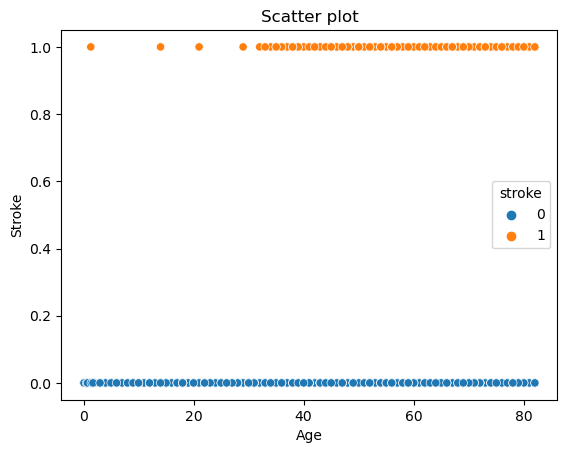

In [7]:
import seaborn as sns
# Scatter plot with hue parameter
sns.scatterplot(x='age', y='stroke', hue='stroke', data=data)
plt.title("Scatter plot")
plt.xlabel("Age")
plt.ylabel("Stroke")
plt.show()

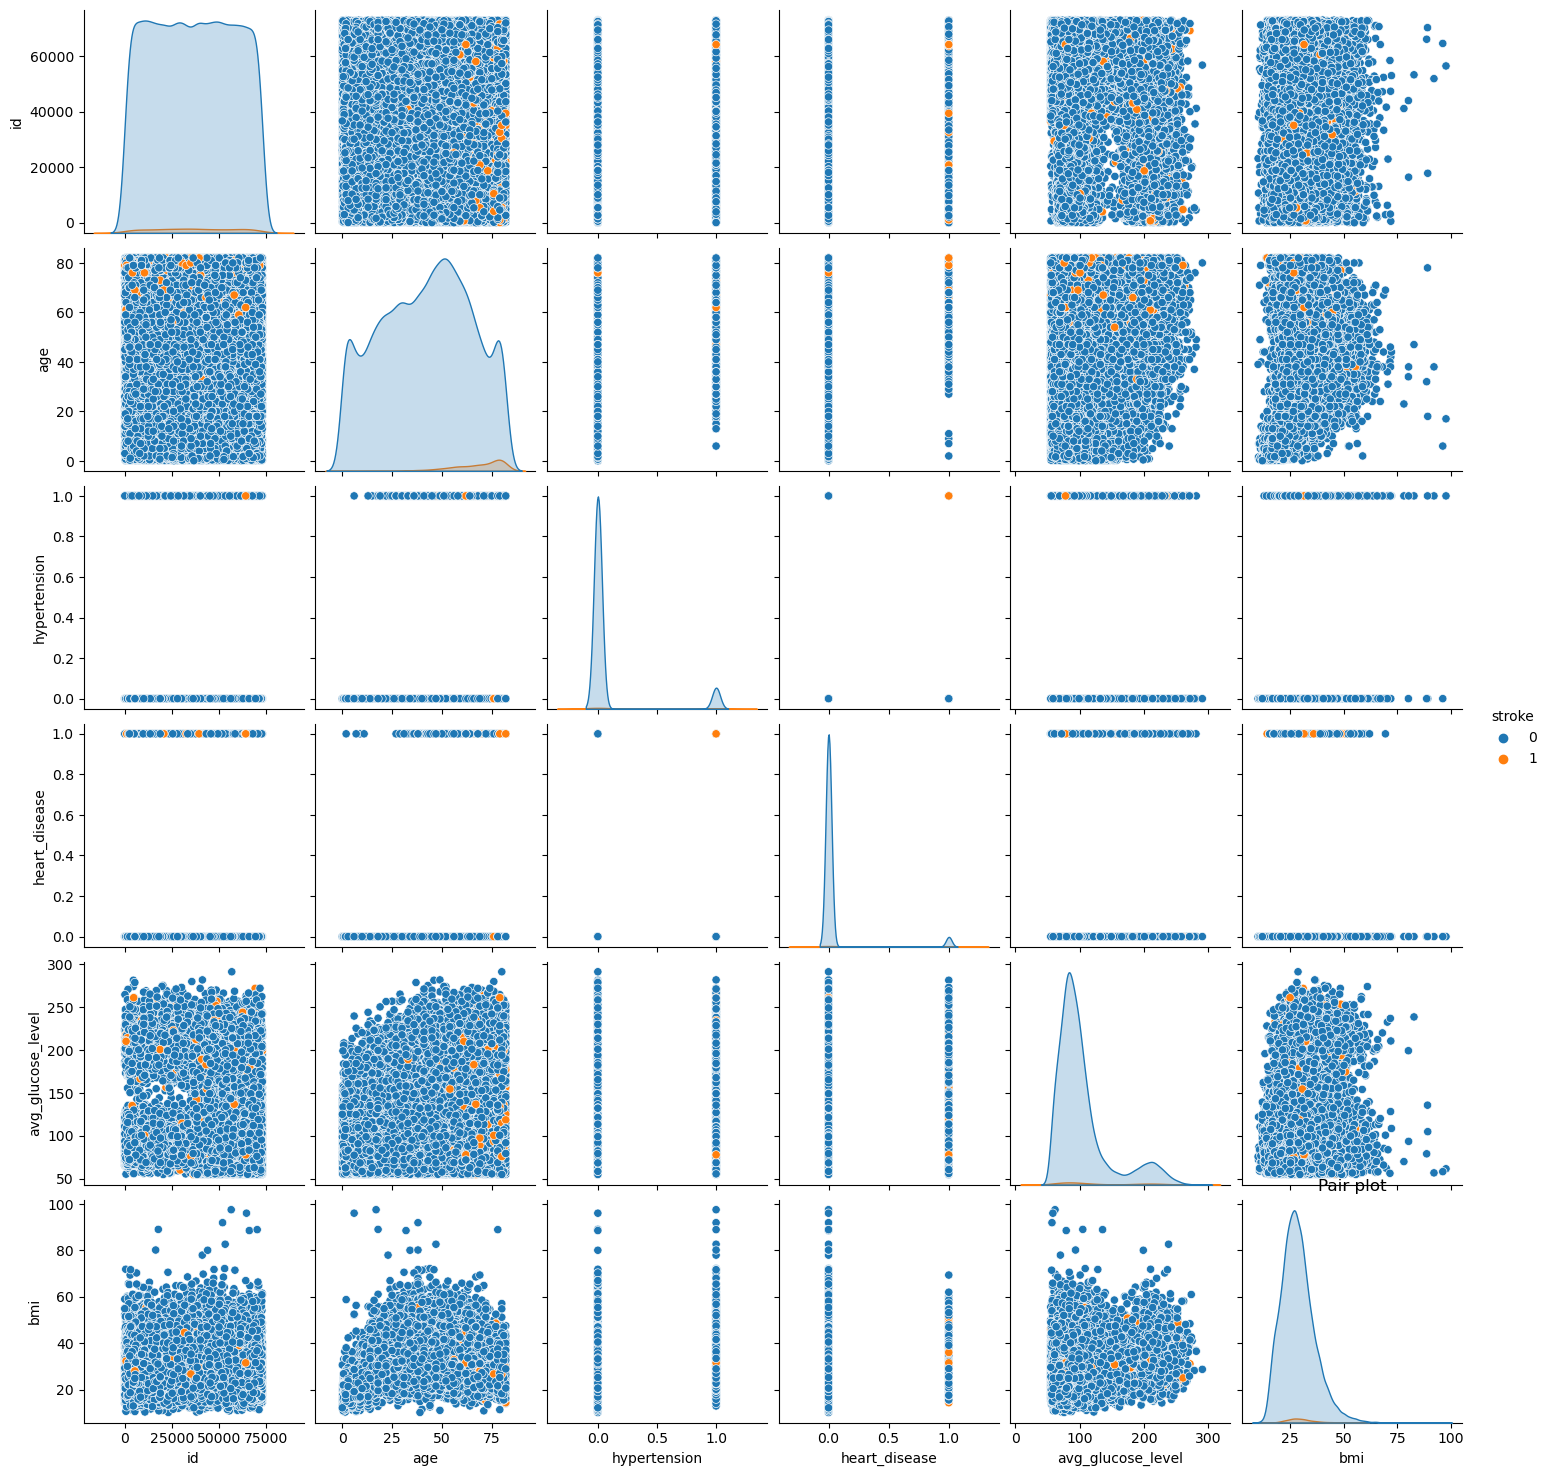

In [8]:
#data relationships:
#pair plot
sns.pairplot(data,hue='stroke')
plt.title("Pair plot")
plt.show()

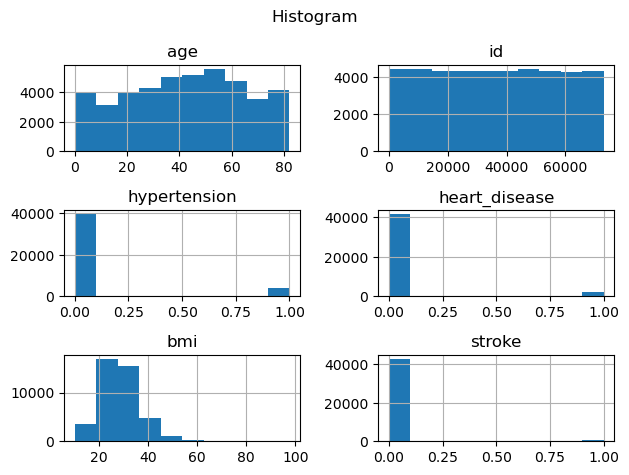

In [9]:
#data Visualisation
#Histogram
data[['age','id','gender','hypertension','heart_disease','ever_married','work_type','bmi','stroke']].hist()
# Add a title
plt.suptitle("Histogram")
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


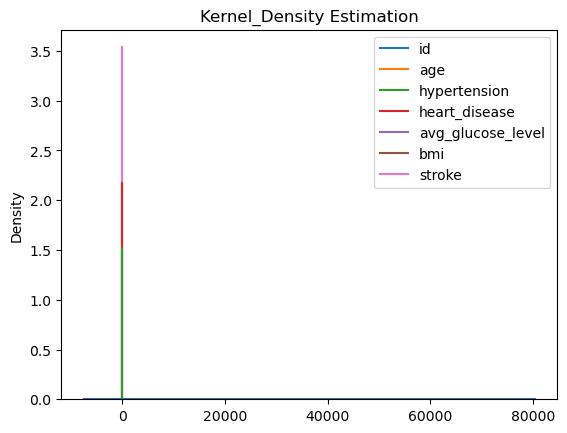

In [14]:
#distribution analysis
sns.kdeplot(data=data)
plt.title("Kernel_Density Estimation")
plt.show()

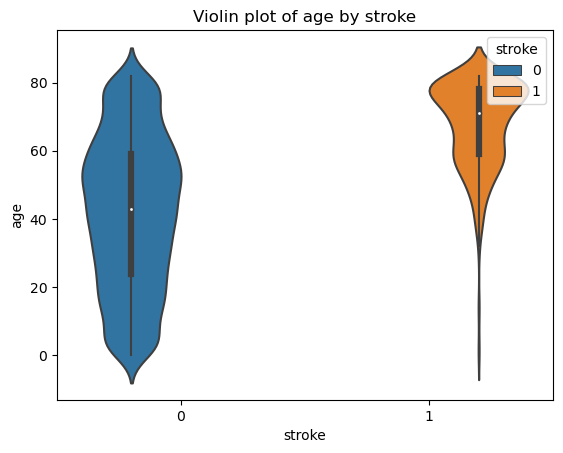

In [39]:
#violin plot
sns.violinplot(x='stroke',y='age',data=data,hue='stroke')
plt.title("Violin plot of age by stroke")
plt.show()

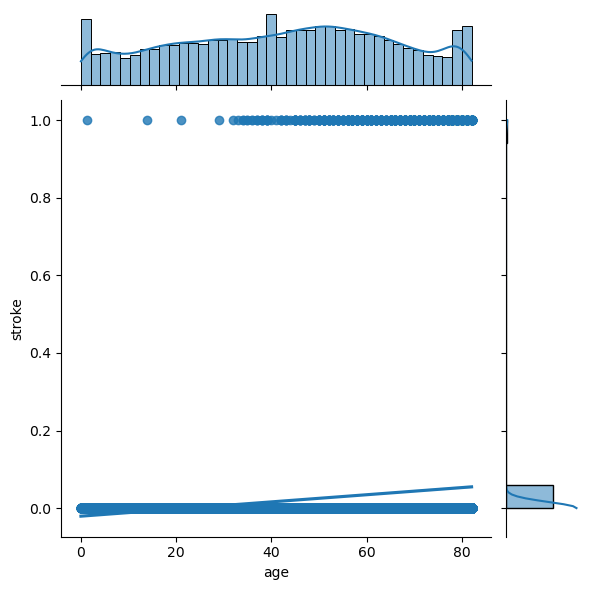

In [18]:
#joint plot:
sns.jointplot(x = 'age', y = 'stroke', data = data, kind = 'reg')
plt.show()


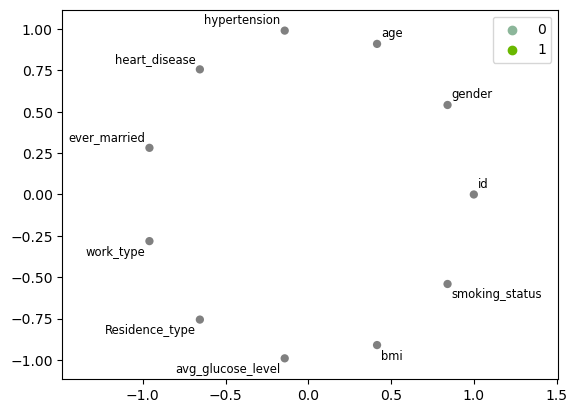

In [27]:
#radvizplot
from pandas.plotting import radviz
radviz(data, 'stroke')
plt.show()

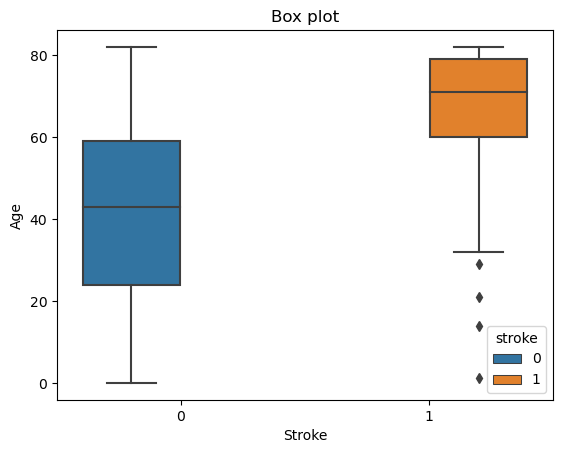

In [10]:
# Box plot
sns.boxplot(x='stroke', y='age', data=data,hue="stroke")
plt.title("Box plot")
plt.xlabel("Stroke")
plt.ylabel("Age")
plt.show()



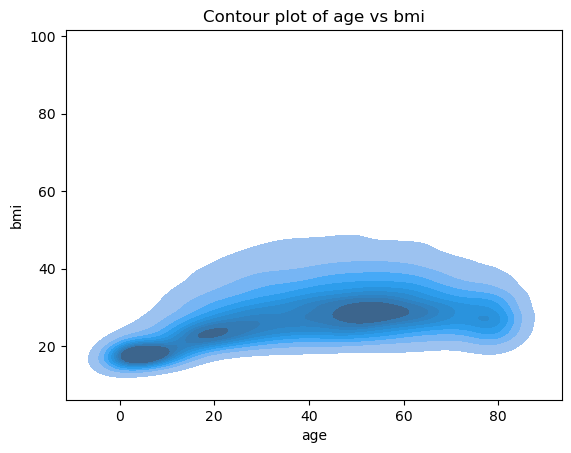

In [20]:
#contour plot
sns.kdeplot(x='age',y='bmi',data=data,fill=True)
plt.title("Contour plot of age vs bmi")
plt.show()

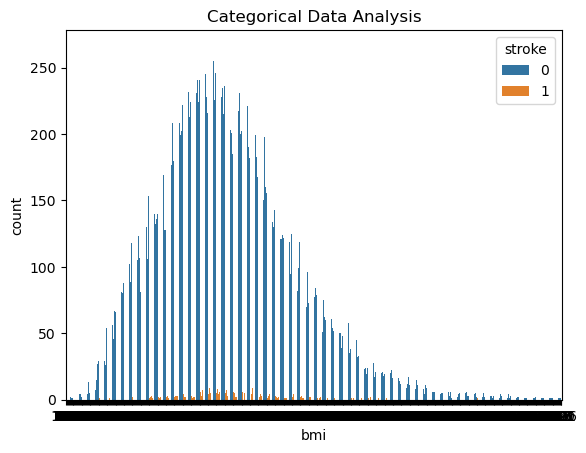

In [17]:
sns.countplot(x="bmi",data=data,hue="stroke")
plt.title("Categorical Data Analysis") 
plt.show()

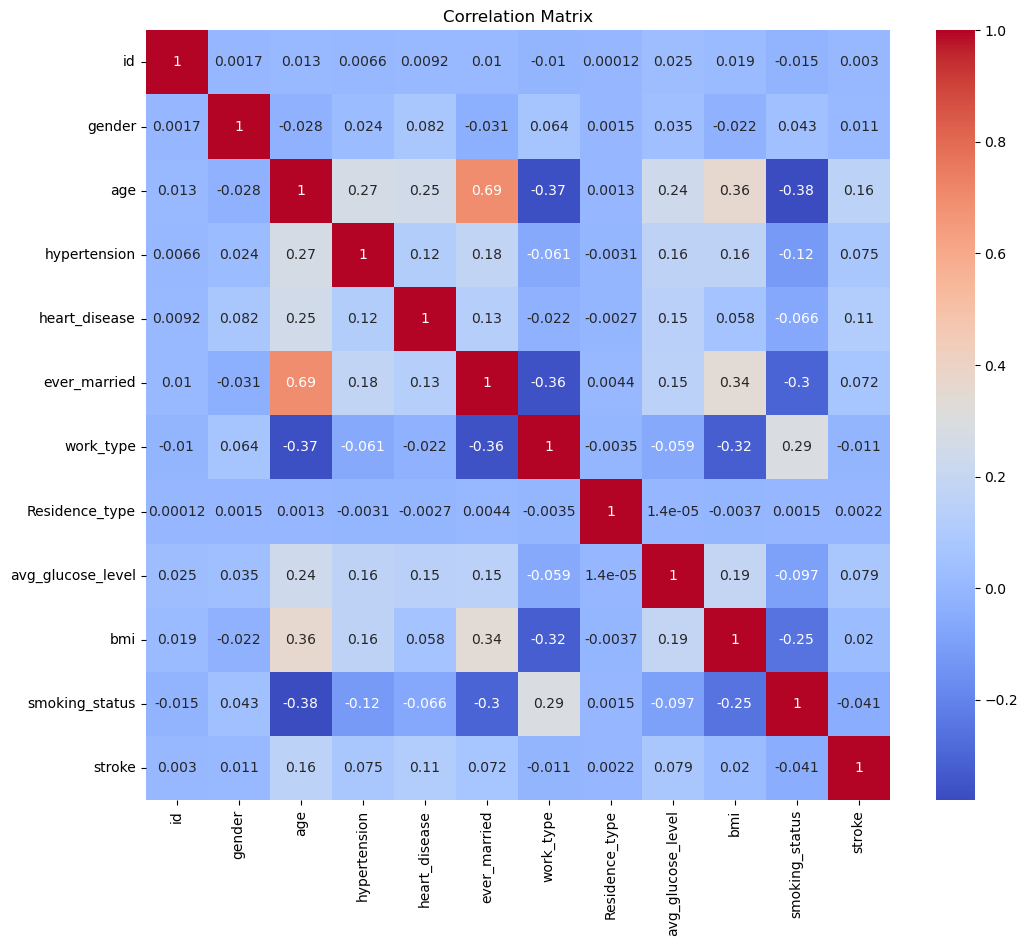

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is stored in a CSV file named 'data.csv'
df = pd.read_csv('C:\\Users\\hp\\Downloads\\dataset (1).csv')

# Identify categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
label_encoder = LabelEncoder()
for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [56]:
#feature scaling
data['new_feature']=data['id']+data['age']
print(data['new_feature'])

0        9113.0
1       51737.0
2       31192.0
3       60231.0
4        1744.0
         ...   
5105    18314.0
5106    44954.0
5107    19758.0
5108    37595.0
5109    44723.0
Name: new_feature, Length: 5110, dtype: float64


In [25]:
#filtering the data
filtered=data[data['age']>50]
print(filtered)

          id  gender   age  hypertension  heart_disease ever_married  \
1      30468    MALE  58.0             1              0          Yes   
3      56543  FEMALE  70.0             0              0          Yes   
6      52800  FEMALE  52.0             0              0          Yes   
7      41413  FEMALE  75.0             0              1          Yes   
9      28674  FEMALE  74.0             1              0          Yes   
...      ...     ...   ...           ...            ...          ...   
43388  31321  FEMALE  64.0             1              0          Yes   
43390  10096  FEMALE  69.0             0              0          Yes   
43396   5450  FEMALE  56.0             0              0          Yes   
43397  28375  FEMALE  82.0             1              0          Yes   
43399  36271  FEMALE  82.0             0              0          Yes   

           work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
1            Private          Urban              87.96

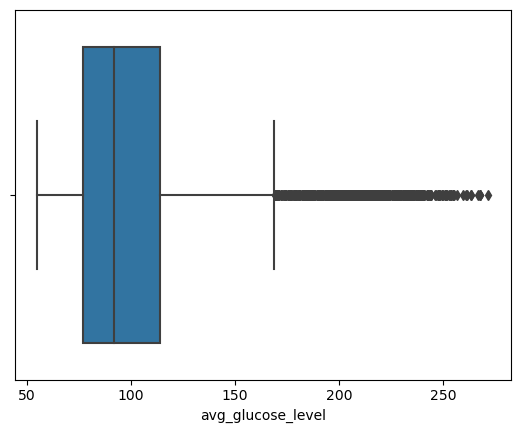

In [9]:
#outlier analysis:
sns.boxplot(x='avg_glucose_level',data=data)
plt.show()

In [45]:
scaler=MinMaxScaler()
data['bmi']=scaler.fit_transform(data[['bmi']])

In [35]:
#grouping:
group = data.groupby(['age', 'bmi'])['id'].mean()
print(group)

age    bmi 
0.08   14.1    47350.0
       16.9    29955.0
0.16   13.0    41500.0
       13.9     8247.0
       17.4    22877.0
                ...   
82.00  33.7    49849.0
       33.9     7411.0
       35.4    70344.0
       36.9    11184.0
       47.5    34496.0
Name: id, Length: 4243, dtype: float64


In [63]:
from sklearn.preprocessing import StandardScaler
# Assuming 'data' is your dataset
scaler = StandardScaler()
data_transformed = scaler.fit_transform(data)
print(data_transformed)

[[-1.5666989  -1.17769538  1.07691973]
 [-1.21854359  0.57244017 -1.78619013]
 [-0.87038828 -1.46938464  0.06832421]
 [-0.52223297  1.04643521  0.23100091]
 [-0.17407766  0.75474595  1.14199041]
 [ 0.17407766 -1.46938464  0.81663702]
 [ 0.52223297  1.15581868 -0.12688782]
 [ 0.87038828  0.75474595 -1.52590742]
 [ 1.21854359 -0.52139455  0.84917236]
 [ 1.5666989   0.35367323 -0.74505927]]


C:\Users\hp\AppData\Local\Temp\ipykernel_21072\1393195350.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_21072\1393195350.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_21072\1393195

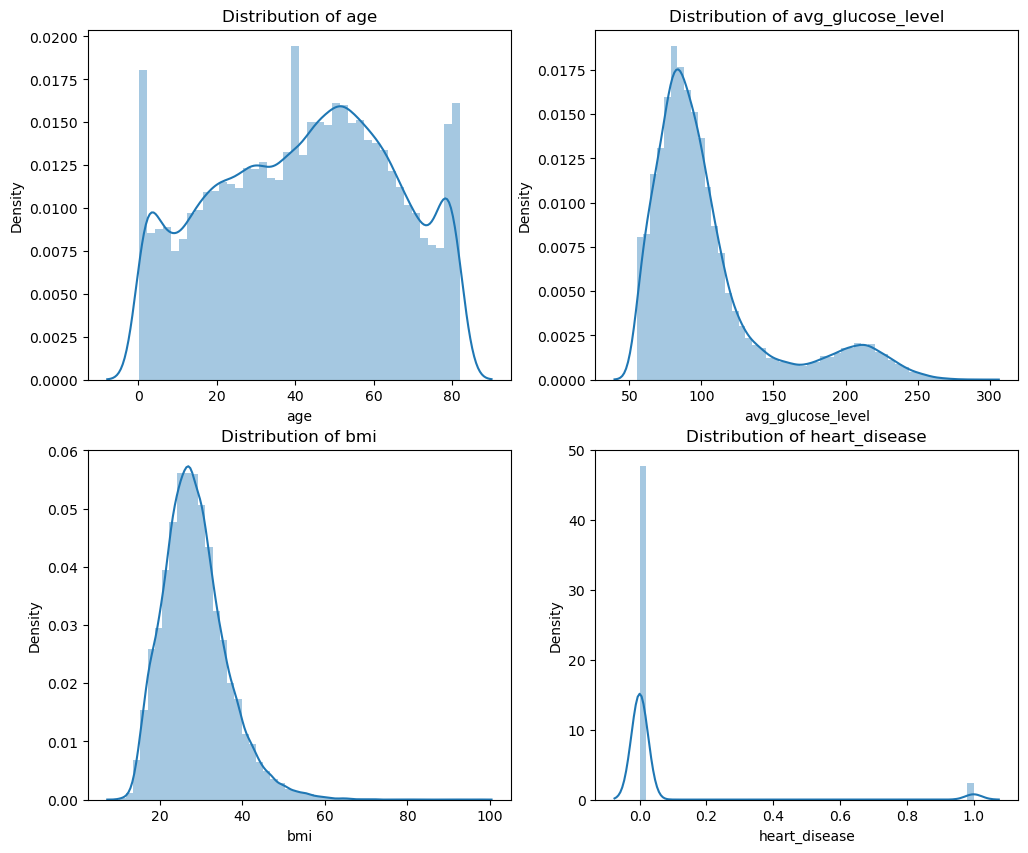

In [30]:
num= ['age','avg_glucose_level','bmi','heart_disease']

plt.figure(figsize=(12,10))

for i,col in enumerate(num):
    plt.subplot(2,2, i +1)
    sns.distplot(data[col])
    plt.title(f'Distribution of {col}')

plt.show()

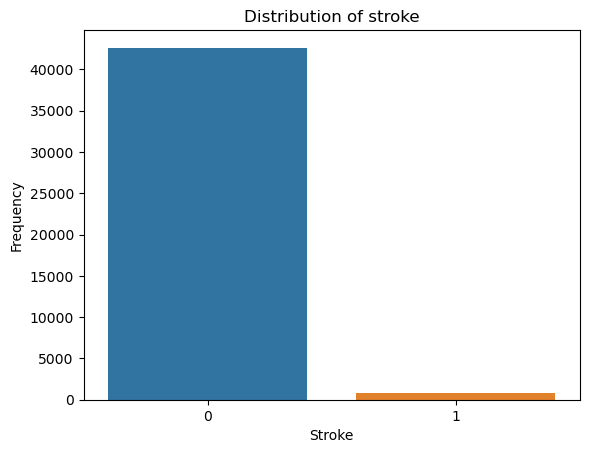

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
#loading the data
data=pd.read_csv("C:\\Users\\hp\\Downloads\\dataset (1).csv")

sns.countplot(x='stroke', data=data)

# Add titles and labels
plt.title('Distribution of stroke')
plt.xlabel('Stroke')
plt.ylabel('Frequency')

# Show the plot
plt.show()


# 3d

# Classifiers before optimization

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Load dataset
dataset_path = "C:/Users/hp/Downloads/dataset (1).csv"
data = pd.read_csv(dataset_path)

# Print column names to verify
print("Column Names:", data.columns)

# Preprocessing - Handle missing values, encode categorical variables, etc.

# Identify categorical columns (replace 'categorical_columns' with your actual categorical columns)
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Identify numerical columns
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Apply one-hot encoding to categorical columns and impute missing values for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', SimpleImputer(strategy='mean'), numerical_columns)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(data.drop(columns=['stroke']))

# Extract target variable
y = data['stroke']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "K-nearest Neighbor": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naïve Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Multi-Layer Perception": MLPClassifier(),
    "Nearest Centroid": NearestCentroid()
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Print results
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print("\n")


Column Names: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classifier: Support Vector Machine
Accuracy: 0.9815
Precision: 0.4907
Recall: 0.5000
F1-score: 0.4953


Classifier: Random Forest
Accuracy: 0.9815
Precision: 0.4907
Recall: 0.5000
F1-score: 0.4953


Classifier: K-nearest Neighbor
Accuracy: 0.9813
Precision: 0.4907
Recall: 0.4999
F1-score: 0.4953


Classifier: Decision Tree
Accuracy: 0.9618
Precision: 0.5243
Recall: 0.5296
F1-score: 0.5265


Classifier: Naïve Bayes
Accuracy: 0.9603
Precision: 0.5305
Recall: 0.5410
F1-score: 0.5347


Classifier: AdaBoost
Accuracy: 0.9811
Precision: 0.4907
Recall: 0.4998
F1-score: 0.4952


Classifier: Gradient Boosting
Accuracy: 0.9811
Precision: 0.4907
Recall: 0.4998
F1-score: 0.4952


Classifier: Multi-Layer Perception
Accuracy: 0.9671
Precision: 0.5315
Recall: 0.5292
F1-score: 0.5303


Classifier: Nearest Centroid
Accuracy: 0.5077
Precision: 0.4980
Recall: 0.4719
F1-score: 0.3508




In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Load dataset
dataset_path = "C:/Users/hp/Downloads/dataset (1).csv"
data = pd.read_csv(dataset_path)

# Print column names to verify
print("Column Names:", data.columns)

# Preprocessing - Handle missing values, encode categorical variables, etc.

# Identify categorical columns (replace 'categorical_columns' with your actual categorical columns)
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Identify numerical columns
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Apply one-hot encoding to categorical columns and impute missing values for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', SimpleImputer(strategy='mean'), numerical_columns)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(data.drop(columns=['stroke']))

# Extract target variable
y = data['stroke']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-nearest Neighbor": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Multi-Layer Perception": MLPClassifier(),
   
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Print results
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print("\n")


Column Names: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classifier: Support Vector Machine
Accuracy: 0.9815
Precision: 0.4907
Recall: 0.5000
F1-score: 0.4953


Classifier: Random Forest
Accuracy: 0.9815
Precision: 0.4907
Recall: 0.5000
F1-score: 0.4953


Classifier: Decision Tree
Accuracy: 0.9632
Precision: 0.5242
Recall: 0.5273
F1-score: 0.5256


Classifier: K-nearest Neighbor
Accuracy: 0.9813
Precision: 0.4907
Recall: 0.4999
F1-score: 0.4953


Classifier: AdaBoost
Accuracy: 0.9811
Precision: 0.4907
Recall: 0.4998
F1-score: 0.4952


Classifier: Multi-Layer Perception
Accuracy: 0.9815
Precision: 0.4907
Recall: 0.5000
F1-score: 0.4953




C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
#voting classifier 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Load dataset
dataset_path = "C:/Users/hp/Downloads/dataset (1).csv"
data = pd.read_csv(dataset_path)

# Print column names to verify
print("Column Names:", data.columns)

# Preprocessing - Handle missing values, encode categorical variables, etc.

# Identify categorical columns (replace 'categorical_columns' with your actual categorical columns)
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Identify numerical columns
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Apply one-hot encoding to categorical columns and impute missing values for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', SimpleImputer(strategy='mean'), numerical_columns)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(data.drop(columns=['stroke']))

# Extract target variable
y = data['stroke']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "K-nearest Neighbor": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naïve Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Multi-Layer Perception": MLPClassifier(),
    "Nearest Centroid": NearestCentroid()
}

# Add classifiers to Voting Classifier
estimators = [(name, clf) for name, clf in classifiers.items()]

# Initialize Voting Classifier
voting_clf = VotingClassifier(estimators=estimators)
# Train and evaluate Voting Classifier
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# Print results for Voting Classifier
print("Classifier: Voting Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Classifier:knn")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Column Names: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda

Classifier: Voting Classifier
Accuracy: 0.9815
Precision: 0.4907
Recall: 0.5000
F1-score: 0.4953
Classifier:knn
Accuracy: 0.9815
Precision: 0.4907
Recall: 0.5000
F1-score: 0.4953


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# classifiers after optimization

# confusion matrix for all the classifiers

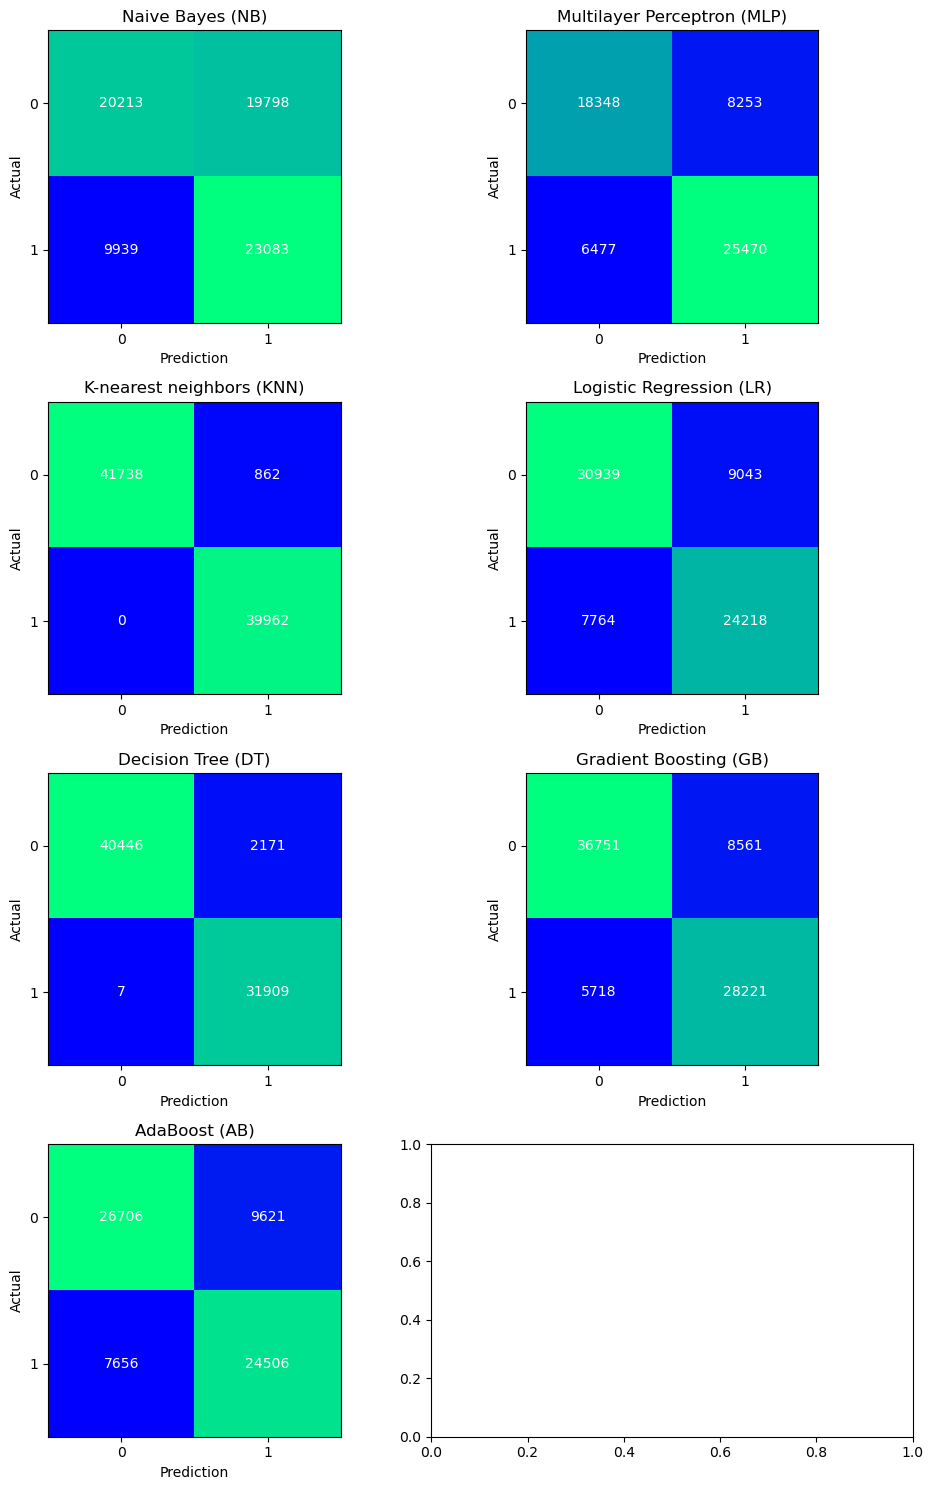

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Define the confusion matrix values
nb_cm = np.array([[20213, 19798], [9939, 23083]])
mlp_cm = np.array([[18348, 8253], [6477, 25470]])
knn_cm = np.array([[41738, 862], [0, 39962]])
lr_cm = np.array([[30939, 9043], [7764, 24218]])
dt_cm = np.array([[40446, 2171], [7, 31909]])
gb_cm = np.array([[36751, 8561], [5718, 28221]])
ab_cm = np.array([[26706, 9621], [7656, 24506]])

# Define the labels for the axes
labels = ['0', '1']

# Create the subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# Plot the confusion matrices
axes[0, 0].imshow(nb_cm, cmap='winter', interpolation='nearest')
axes[0, 0].set_title('Naive Bayes (NB)')
axes[0, 0].set_xticks(np.arange(len(labels)))
axes[0, 0].set_yticks(np.arange(len(labels)))
axes[0, 0].set_xticklabels(labels)
axes[0, 0].set_yticklabels(labels)
axes[0, 0].set_xlabel('Prediction')
axes[0, 0].set_ylabel('Actual')
for i in range(len(labels)):
    for j in range(len(labels)):
        axes[0, 0].text(j, i, nb_cm[i, j], ha='center', va='center', color='white')

axes[0, 1].imshow(mlp_cm, cmap='winter', interpolation='nearest')
axes[0, 1].set_title('Multilayer Perceptron (MLP)')
axes[0, 1].set_xticks(np.arange(len(labels)))
axes[0, 1].set_yticks(np.arange(len(labels)))
axes[0, 1].set_xticklabels(labels)
axes[0, 1].set_yticklabels(labels)
axes[0, 1].set_xlabel('Prediction')
axes[0, 1].set_ylabel('Actual')
for i in range(len(labels)):
    for j in range(len(labels)):
        axes[0, 1].text(j, i, mlp_cm[i, j], ha='center', va='center', color='white')

axes[1, 0].imshow(knn_cm, cmap='winter', interpolation='nearest')
axes[1, 0].set_title('K-nearest neighbors (KNN)')
axes[1, 0].set_xticks(np.arange(len(labels)))
axes[1, 0].set_yticks(np.arange(len(labels)))
axes[1, 0].set_xticklabels(labels)
axes[1, 0].set_yticklabels(labels)
axes[1, 0].set_xlabel('Prediction')
axes[1, 0].set_ylabel('Actual')
for i in range(len(labels)):
    for j in range(len(labels)):
        axes[1, 0].text(j, i, knn_cm[i, j], ha='center', va='center', color='white')

axes[1, 1].imshow(lr_cm, cmap='winter', interpolation='nearest')
axes[1, 1].set_title('Logistic Regression (LR)')
axes[1, 1].set_xticks(np.arange(len(labels)))
axes[1, 1].set_yticks(np.arange(len(labels)))
axes[1, 1].set_xticklabels(labels)
axes[1, 1].set_yticklabels(labels)
axes[1, 1].set_xlabel('Prediction')
axes[1, 1].set_ylabel('Actual')
for i in range(len(labels)):
    for j in range(len(labels)):
        axes[1, 1].text(j, i, lr_cm[i, j], ha='center', va='center', color='white')

axes[2, 0].imshow(dt_cm, cmap='winter', interpolation='nearest')
axes[2, 0].set_title('Decision Tree (DT)')
axes[2, 0].set_xticks(np.arange(len(labels)))
axes[2, 0].set_yticks(np.arange(len(labels)))
axes[2, 0].set_xticklabels(labels)
axes[2, 0].set_yticklabels(labels)
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Actual')
for i in range(len(labels)):
    for j in range(len(labels)):
        axes[2, 0].text(j, i, dt_cm[i, j], ha='center', va='center', color='white')

axes[2, 1].imshow(gb_cm, cmap='winter', interpolation='nearest')
axes[2, 1].set_title('Gradient Boosting (GB)')
axes[2, 1].set_xticks(np.arange(len(labels)))
axes[2, 1].set_yticks(np.arange(len(labels)))
axes[2, 1].set_xticklabels(labels)
axes[2, 1].set_yticklabels(labels)
axes[2, 1].set_xlabel('Prediction')
axes[2, 1].set_ylabel('Actual')
for i in range(len(labels)):
    for j in range(len(labels)):
        axes[2, 1].text(j, i, gb_cm[i, j], ha='center', va='center', color='white')

axes[3, 0].imshow(ab_cm, cmap='winter', interpolation='nearest')
axes[3, 0].set_title('AdaBoost (AB)')
axes[3, 0].set_xticks(np.arange(len(labels)))
axes[3, 0].set_yticks(np.arange(len(labels)))
axes[3, 0].set_xticklabels(labels)
axes[3, 0].set_yticklabels(labels)
axes[3, 0].set_xlabel('Prediction')
axes[3, 0].set_ylabel('Actual')
for i in range(len(labels)):
    for j in range(len(labels)):
        axes[3, 0].text(j, i, ab_cm[i, j], ha='center', va='center', color='white')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

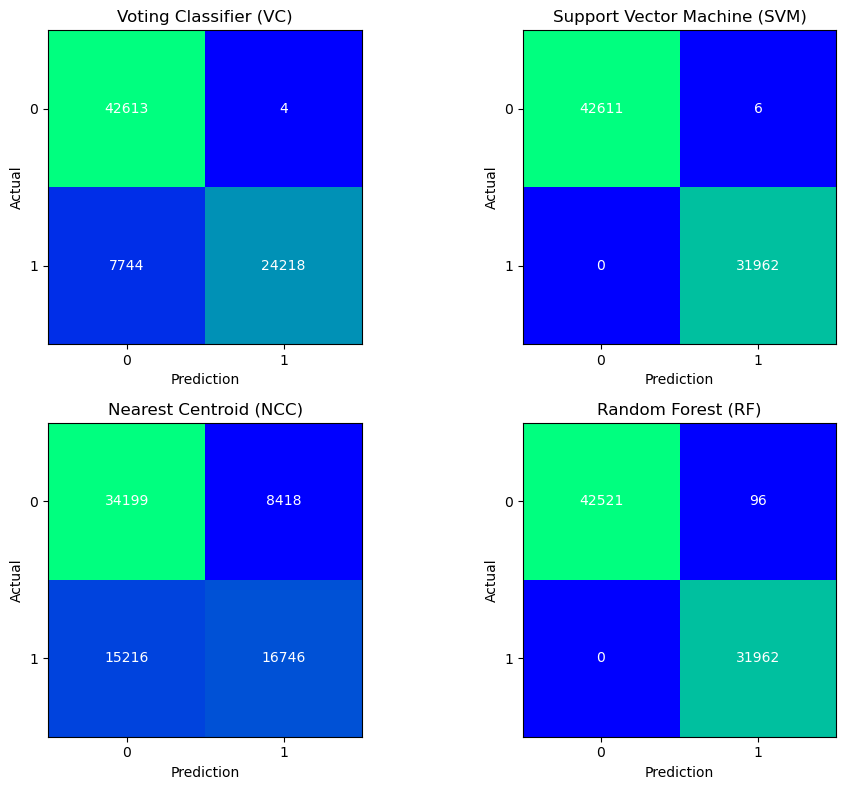

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix data
vc = np.array([[42613, 4], [7744, 24218]])
svm = np.array([[42611, 6], [0, 31962]])
ncc = np.array([[34199, 8418], [15216, 16746]])
rf = np.array([[42521, 96], [0, 31962]])

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot confusion matrices
axs[0, 0].imshow(vc, cmap="winter", interpolation="nearest")
axs[0, 0].set_title("Voting Classifier (VC)")
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_yticks([0, 1])
axs[0, 0].set_xlabel("Prediction")
axs[0, 0].set_ylabel("Actual")
axs[0, 0].text(0, 0, str(vc[0, 0]), ha="center", va="center", color="white")
axs[0, 0].text(1, 0, str(vc[0, 1]), ha="center", va="center", color="white")
axs[0, 0].text(0, 1, str(vc[1, 0]), ha="center", va="center", color="white")
axs[0, 0].text(1, 1, str(vc[1, 1]), ha="center", va="center", color="white")

axs[0, 1].imshow(svm, cmap="winter", interpolation="nearest")
axs[0, 1].set_title("Support Vector Machine (SVM)")
axs[0, 1].set_xticks([0, 1])
axs[0, 1].set_yticks([0, 1])
axs[0, 1].set_xlabel("Prediction")
axs[0, 1].set_ylabel("Actual")
axs[0, 1].text(0, 0, str(svm[0, 0]), ha="center", va="center", color="white")
axs[0, 1].text(1, 0, str(svm[0, 1]), ha="center", va="center", color="white")
axs[0, 1].text(0, 1, str(svm[1, 0]), ha="center", va="center", color="white")
axs[0, 1].text(1, 1, str(svm[1, 1]), ha="center", va="center", color="white")

axs[1, 0].imshow(ncc, cmap="winter", interpolation="nearest")
axs[1, 0].set_title("Nearest Centroid (NCC)")
axs[1, 0].set_xticks([0, 1])
axs[1, 0].set_yticks([0, 1])
axs[1, 0].set_xlabel("Prediction")
axs[1, 0].set_ylabel("Actual")
axs[1, 0].text(0, 0, str(ncc[0, 0]), ha="center", va="center", color="white")
axs[1, 0].text(1, 0, str(ncc[0, 1]), ha="center", va="center", color="white")
axs[1, 0].text(0, 1, str(ncc[1, 0]), ha="center", va="center", color="white")
axs[1, 0].text(1, 1, str(ncc[1, 1]), ha="center", va="center", color="white")

axs[1, 1].imshow(rf, cmap="winter", interpolation="nearest")
axs[1, 1].set_title("Random Forest (RF)")
axs[1, 1].set_xticks([0, 1])
axs[1, 1].set_yticks([0, 1])
axs[1, 1].set_xlabel("Prediction")
axs[1, 1].set_ylabel("Actual")
axs[1, 1].text(0, 0, str(rf[0, 0]), ha="center", va="center", color="white")
axs[1, 1].text(1, 0, str(rf[0, 1]), ha="center", va="center", color="white")
axs[1, 1].text(0, 1, str(rf[1, 0]), ha="center", va="center", color="white")
axs[1, 1].text(1, 1, str(rf[1, 1]), ha="center", va="center", color="white")

# Adjust spacing
plt.tight_layout()
plt.show()

# plotting accuracy before optimization

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


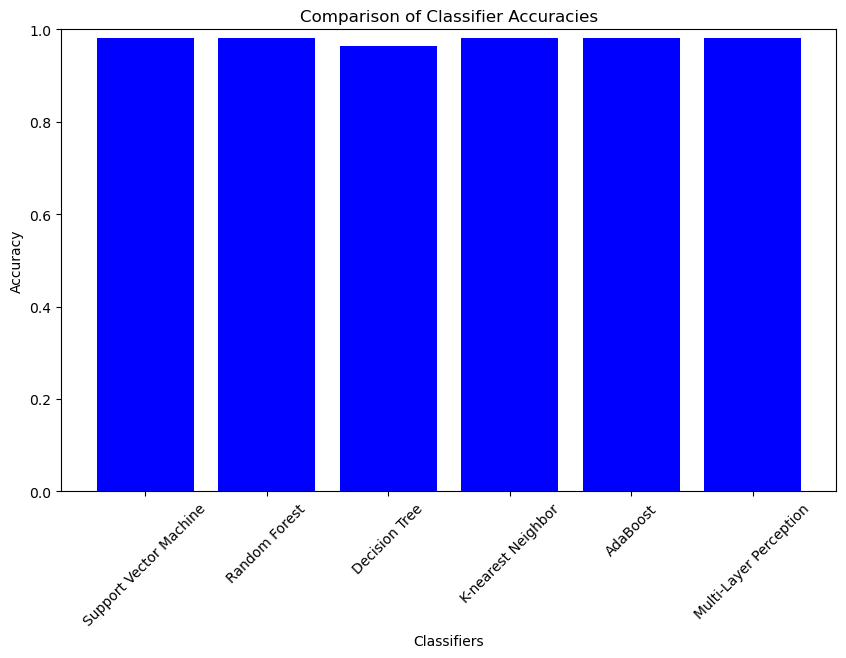

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Load dataset
dataset_path = "C:/Users/hp/Downloads/dataset (1).csv"
data = pd.read_csv(dataset_path)

# Identify categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Identify numerical columns
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Apply one-hot encoding to categorical columns and impute missing values for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', SimpleImputer(strategy='mean'), numerical_columns)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(data.drop(columns=['stroke']))
y = data['stroke']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-nearest Neighbor": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Multi-Layer Perception": MLPClassifier(),
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='blue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1 for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
